In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

## Poverty statistics

### Dataset contents

This dataset collects the information on:
*   the name of the country - **Country**,
*   a three-character country code - **Code**,
*   the continent where the country is - **Continent**,
*   the year the statistics are for - **Year**,
*   share of the population that lives in extreme poverty- **Share Extreme Poverty**,
*   indicator of the population living below the international poverty line - **Poverty Headcount Ratio**,
*   multidimensional poverty index - **Share Multipoverty**,
*   share of the population covered by social insurance - **SIP Coverage**,
*   number of deaths, missing persons, and direct victims of natural disasters per 100 000 of population - **Disasters Deaths and Missings**,
*   number of persons who remained in the country after losing shelter as a result of natural disasters - **Disasters Internally Displaced**,
*   number of persons directly affected by the results of natural disasters per 100 000 of population - **Disasters Directly Affected**,
*   financial losses caused by natural disasters, given as a percentage of GDP - **Disasters Direct Economic Loss**,
*   share of healthcare expenditure in the total government expenditure - **Gov Expenditure Health**,
*   share of education expenditure in the total government expenditure - **Gov Expenditure Education**.

The data has been adapted to combine the information for specific countries and years and add continent information.

In [2]:
poverty_data = pd.read_csv('./Preparation of the dataset//Poverty Data/poverty_statistics.csv')
poverty_data

,Country,Code,Continent,Year,SIP Coverage,Disasters Deaths and Missings,Disasters Direct Economic Loss,Gov Expenditure Education,Gov Expenditure Health,Disasters Internally Displaced,Disasters Directly Affected,Share Multipoverty,Share Extreme Poverty,Poverty Headcount Ratio
0,Afghanistan,AFG,Asia,2007,0.539037,NaN,NaN,NaN,2.949193,NaN,NaN,NaN,NaN,36.3
1,Afghanistan,AFG,Asia,2011,NaN,NaN,NaN,16.048429,10.174108,3000.0,NaN,66.2,NaN,35.8
2,Albania,ALB,Europe,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.464528,NaN
3,Albania,ALB,Europe,2002,NaN,NaN,NaN,9.886920,7.192037,NaN,NaN,NaN,1.570843,25.4
4,Albania,ALB,Europe,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.407918,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,French Polynesia,PYF,Oceania,2007,NaN,7.61275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7296,Kuwait,KWT,Asia,2020,NaN,19.44029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7297,Lebanon,LBN,Asia,2020,NaN,0.01465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7298,New Caledonia,NCL,Oceania,2009,NaN,1.59948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Notebook preparation

### Checking data types

In [3]:
poverty_data.dtypes

Country                            object
Code                               object
Continent                          object
Year                                int64
SIP Coverage                      float64
Disasters Deaths and Missings     float64
Disasters Direct Economic Loss    float64
Gov Expenditure Education         float64
Gov Expenditure Health            float64
Disasters Internally Displaced    float64
Disasters Directly Affected       float64
Share Multipoverty                float64
Share Extreme Poverty             float64
Poverty Headcount Ratio           float64
dtype: object

In [4]:
"complete records: " + str(len(poverty_data.dropna(how="any"))) + "; total records: " + str(len(poverty_data))

'complete records: 4; total records: 7300'

In [5]:
poverty_data.isnull().sum()

Country                              0
Code                                 0
Continent                            0
Year                                 0
SIP Coverage                      6903
Disasters Deaths and Missings     5961
Disasters Direct Economic Loss    6124
Gov Expenditure Education         4534
Gov Expenditure Health            3550
Disasters Internally Displaced    5949
Disasters Directly Affected       5934
Share Multipoverty                7197
Share Extreme Poverty              931
Poverty Headcount Ratio           6499
dtype: int64

### Identifying countries in the set

In [6]:
poverty_data["Country"].value_counts()

Country
Ethiopia                        41
Ghana                           41
Sweden                          41
Bangladesh                      41
Solomon Islands                 40
                                ..
British Virgin Islands           1
United States Virgin Islands     1
Cayman Islands                   1
Saint Martin (French part)       1
Sint Maarten (Dutch part)        1
Name: count, Length: 213, dtype: int64

### Converting continent names to categories

In [7]:
poverty_data["Continent"].value_counts()

Continent
Africa           2045
Asia             1772
Europe           1675
North America     839
Oceania           506
South America     463
Name: count, dtype: int64

In [8]:
poverty_data["Continent"] = poverty_data["Continent"].astype("category")

## Preparing dataframes

#### Analyzing social programs and government expenditure ratio

In [9]:
years_and_nulls = pd.DataFrame(pd.Series(poverty_data["Year"].unique(), name="unique year"))
years_and_nulls["nulls"] = years_and_nulls["unique year"].apply(lambda x: poverty_data[(poverty_data["Year"]==x)].isnull().sum().sum())
years_and_nulls["records"] = years_and_nulls["unique year"].apply(lambda x: len(poverty_data[(poverty_data["Year"]==x)]))
years_and_nulls["nulls per record"] = years_and_nulls["nulls"]/years_and_nulls["records"]
years_and_nulls.sort_values(by="unique year")
years_and_nulls[years_and_nulls["nulls per record"]==years_and_nulls["nulls per record"].min()]

,unique year,nulls,records,nulls per record
8,2012,1048,198,5.292929


Data for 2012 looks promising.

In [10]:
poverty_data_one_year =  poverty_data[poverty_data["Year"]==2012]
poverty_data_one_year

,Country,Code,Continent,Year,SIP Coverage,Disasters Deaths and Missings,Disasters Direct Economic Loss,Gov Expenditure Education,Gov Expenditure Health,Disasters Internally Displaced,Disasters Directly Affected,Share Multipoverty,Share Extreme Poverty,Poverty Headcount Ratio
8,Albania,ALB,Europe,2012,36.255063,0.27582,0.000924,NaN,9.710531,NaN,59.29575,NaN,0.849754,14.3
49,Algeria,DZA,Africa,2012,NaN,0.11468,0.000165,NaN,9.988192,NaN,11.91092,NaN,0.415515,NaN
87,Angola,AGO,Africa,2012,NaN,0.38759,0.000198,NaN,5.573031,6400.0,106.66125,NaN,36.781340,NaN
124,Argentina,ARG,South America,2012,28.969560,0.16773,0.003772,14.518260,8.741289,2000.0,542.71734,NaN,NaN,NaN
136,Armenia,ARM,Asia,2012,53.362759,9.06864,0.000009,12.368970,7.438755,NaN,115.01291,NaN,0.916995,32.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7149,Saudi Arabia,SAU,Asia,2012,NaN,NaN,NaN,NaN,7.749074,NaN,NaN,NaN,NaN,NaN
7168,Singapore,SGP,Asia,2012,NaN,NaN,NaN,31.371750,11.098890,NaN,NaN,NaN,NaN,NaN
7187,Aruba,ABW,North America,2012,NaN,NaN,NaN,20.634081,NaN,NaN,NaN,NaN,NaN,NaN
7234,Hong Kong,HKG,Asia,2012,NaN,NaN,NaN,18.649481,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
poverty_data_one_year.isnull().sum()

Country                             0
Code                                0
Continent                           0
Year                                0
SIP Coverage                      159
Disasters Deaths and Missings     109
Disasters Direct Economic Loss    119
Gov Expenditure Education          89
Gov Expenditure Health              8
Disasters Internally Displaced    119
Disasters Directly Affected       106
Share Multipoverty                172
Share Extreme Poverty              31
Poverty Headcount Ratio           136
dtype: int64

In [12]:
selected = poverty_data[(poverty_data["Year"]==2012)& (poverty_data["Share Extreme Poverty"].isnull()==False) &
                        (poverty_data["SIP Coverage"].isnull()==False) & (poverty_data["Gov Expenditure Education"].isnull()==False)
]
SIP_extreme_poverty = selected[["Country","Continent","SIP Coverage", "Share Extreme Poverty","Gov Expenditure Education"]]
SIP_extreme_poverty

,Country,Continent,SIP Coverage,Share Extreme Poverty,Gov Expenditure Education
136,Armenia,Asia,53.362759,0.916995,12.368970
194,Belarus,Europe,47.925471,0.000000,12.752300
227,Brazil,South America,28.344648,3.731201,15.727670
277,Colombia,South America,8.897965,6.247937,15.512830
287,Costa Rica,North America,15.028445,1.691766,23.501560
356,Ecuador,South America,10.674940,4.494096,11.534150
383,El Salvador,North America,5.477152,4.219873,15.279990
823,Ghana,Africa,59.520414,12.169250,37.520962
980,Guinea,Africa,2.284316,36.093460,9.460610
1040,Kyrgyzstan,Asia,41.640562,2.482169,18.195009


#### Extreme poverty share in Africa and South America

In [13]:
share_extreme_poverty =  poverty_data[
                                      (poverty_data["Share Extreme Poverty"].isnull()==False) 
                                       & ((poverty_data["Continent"]=="Africa")  | (poverty_data["Continent"]=="South America"))
                                      ][["Country",	"Continent", "Year", "Share Extreme Poverty"]]
share_extreme_poverty["Continent"] = share_extreme_poverty["Continent"].cat.remove_unused_categories()
share_extreme_poverty

,Country,Continent,Year,Share Extreme Poverty
41,Algeria,Africa,2011,0.470209
42,Algeria,Africa,2013,0.380704
43,Algeria,Africa,2005,2.032179
44,Algeria,Africa,2006,1.745856
45,Algeria,Africa,2007,1.400125
...,...,...,...,...
6389,Zimbabwe,Africa,2013,22.473590
6390,Zimbabwe,Africa,2014,25.462180
6391,Zimbabwe,Africa,2015,28.671930
6392,Zimbabwe,Africa,2016,32.366640


### Statistics for chosen continents

In [ ]:
selected_continents =  poverty_data[(poverty_data["Continent"]=="Africa")  
| (poverty_data["Continent"]=="Europe")
| (poverty_data["Continent"]=="Asia")
| (poverty_data["Continent"]=="North America")
                                      ]
selected_continents["Continent"] = selected_continents["Continent"].cat.remove_unused_categories()
selected_continents

## Exercises

**Exercise 1**

In [15]:
numerical_features = [
    "SIP Coverage", 
    "Disasters Deaths and Missings", 
    "Disasters Direct Economic Loss", 
    "Gov Expenditure Education", 
    "Gov Expenditure Health", 
    "Disasters Internally Displaced", 
    "Disasters Directly Affected", 
    "Share Multipoverty", 
    "Share Extreme Poverty", 
    "Poverty Headcount Ratio"
]

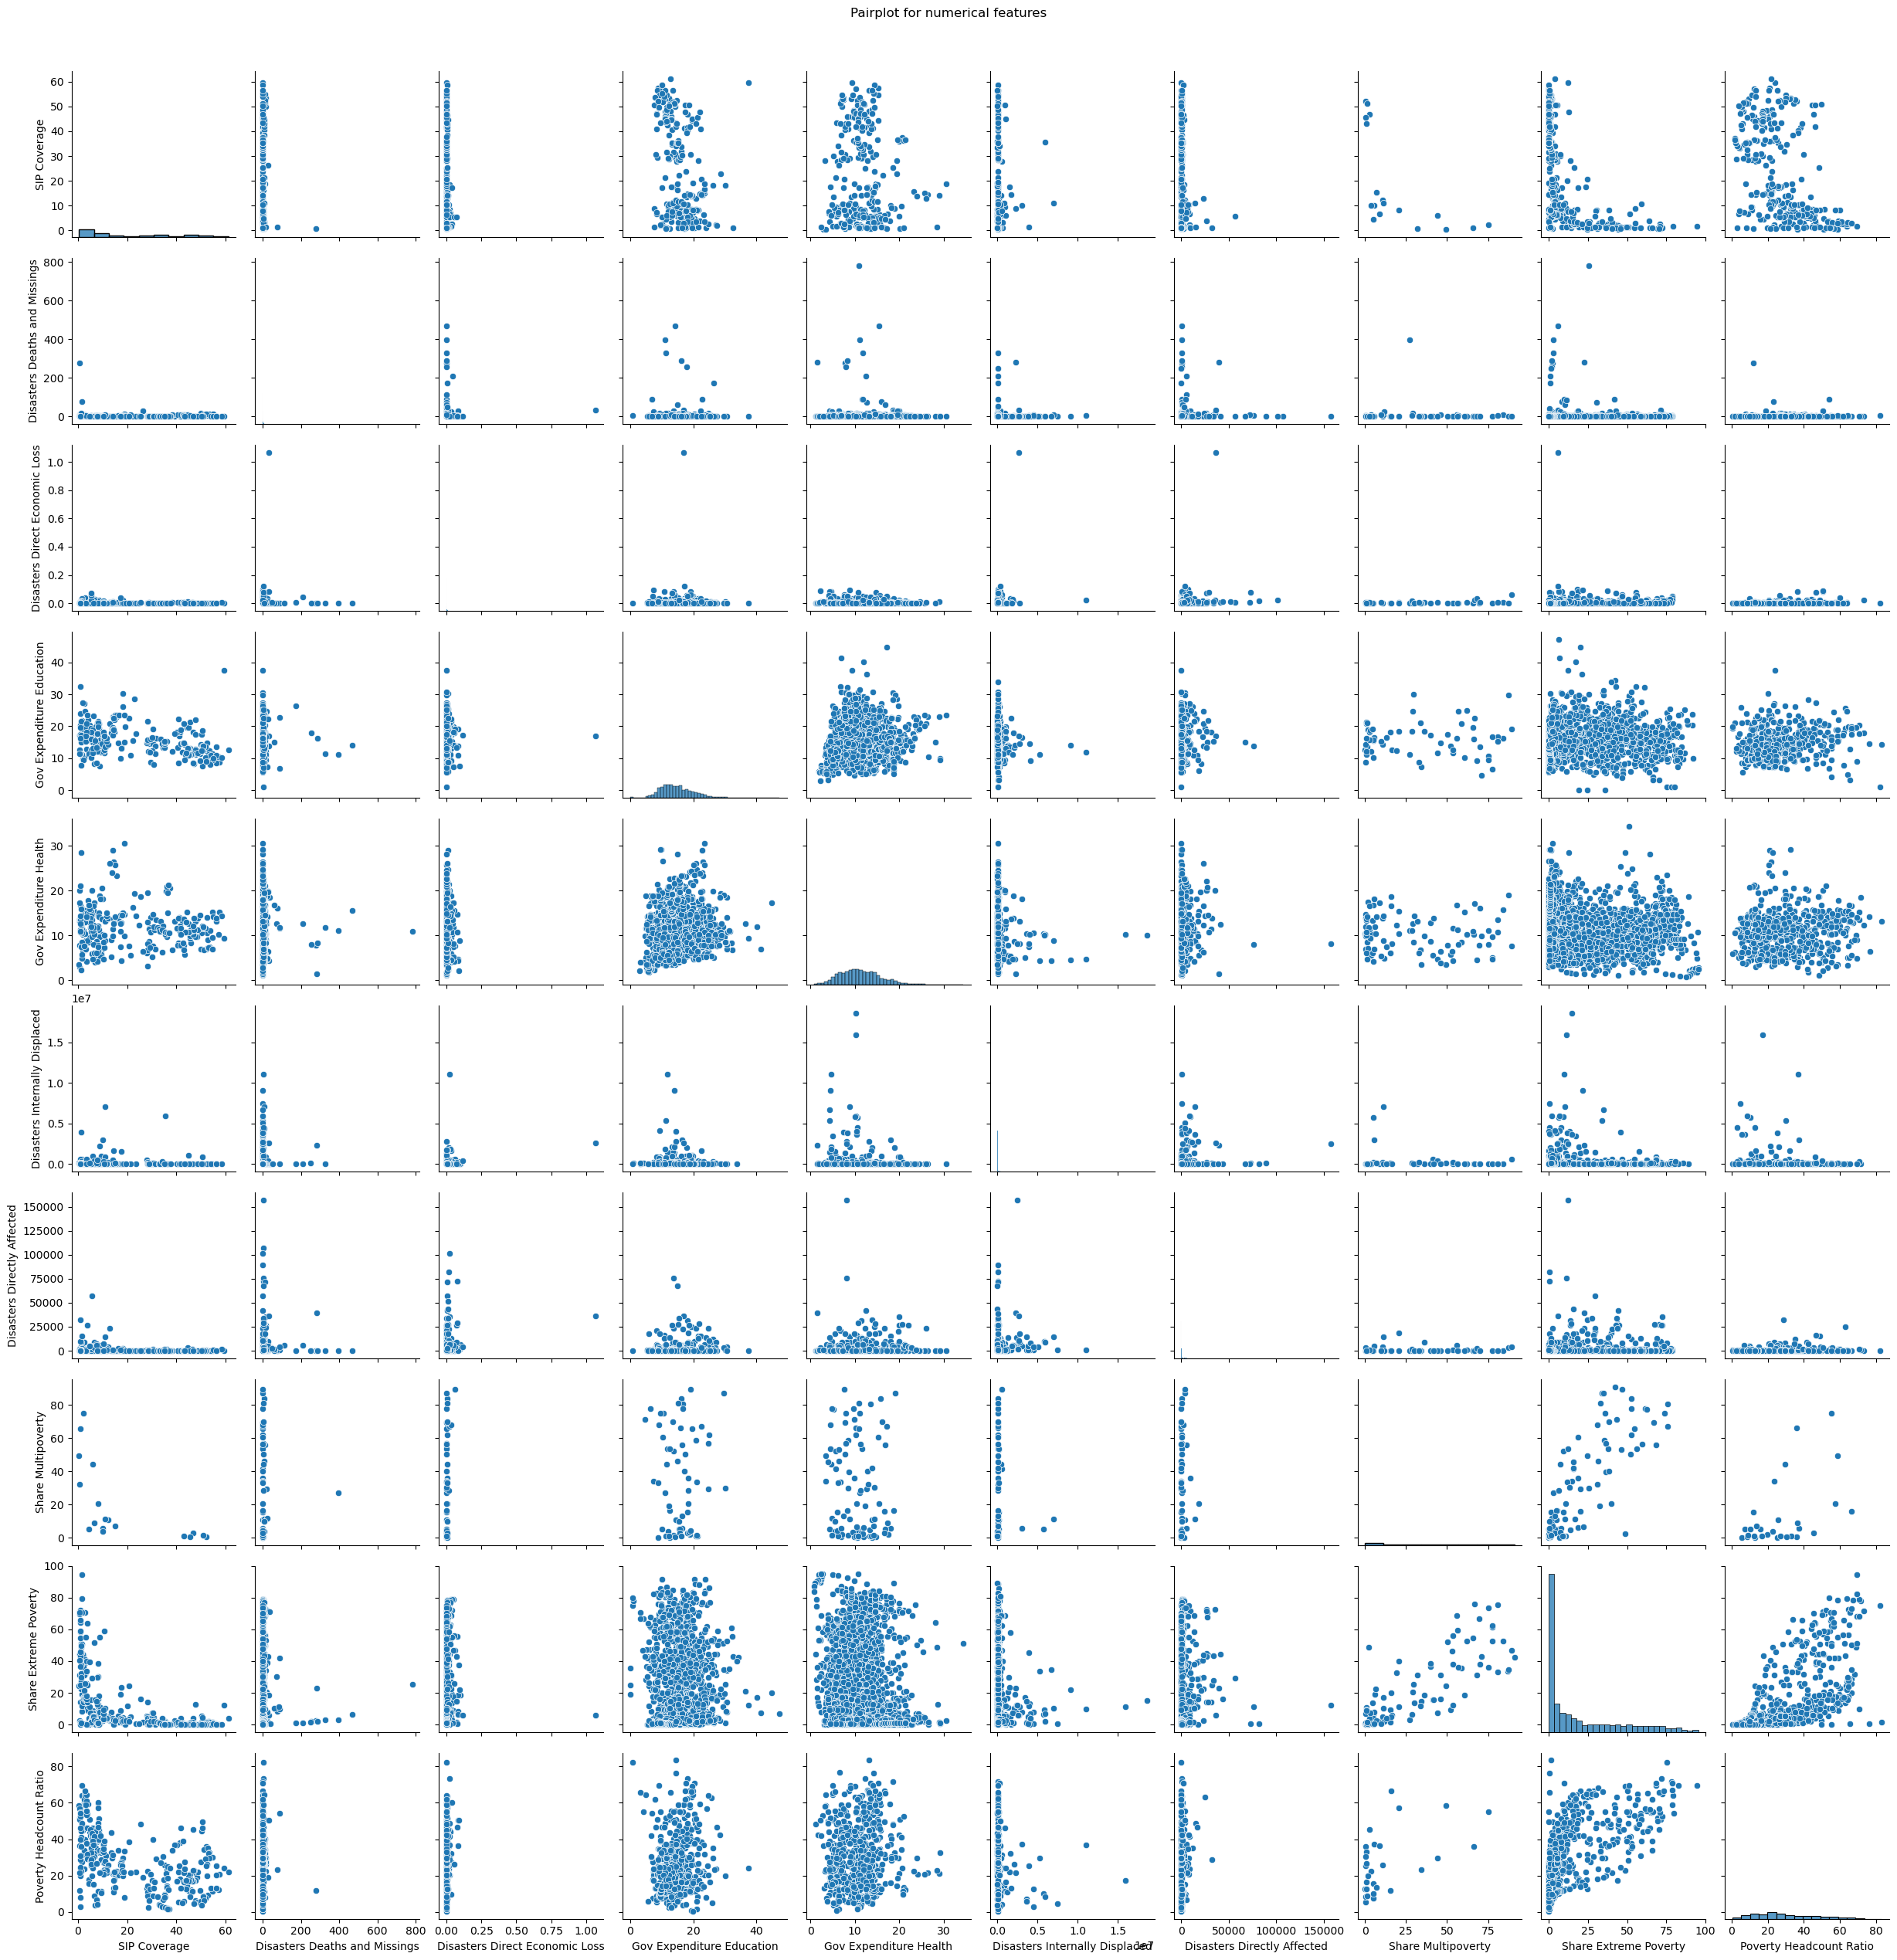

In [16]:
sns.pairplot(poverty_data[numerical_features])
plt.suptitle("Pairplot for numerical features", y=1.02)
plt.show()

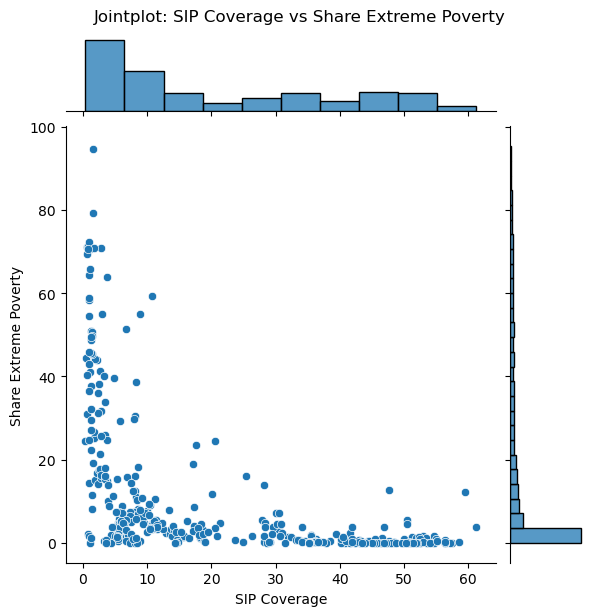

In [17]:
sns.jointplot(
    data=poverty_data,
    x="SIP Coverage",
    y="Share Extreme Poverty",
)
plt.suptitle("Jointplot: SIP Coverage vs Share Extreme Poverty", y=1.02)
plt.show()

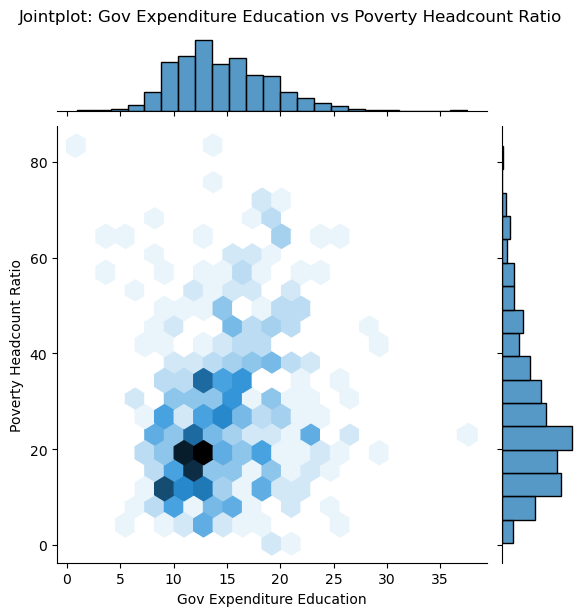

In [21]:
sns.jointplot(
    data=poverty_data,
    x="Gov Expenditure Education",
    y="Poverty Headcount Ratio",
    kind="hex",
)
plt.suptitle("Jointplot: Gov Expenditure Education vs Poverty Headcount Ratio", y=1.02)
plt.show()

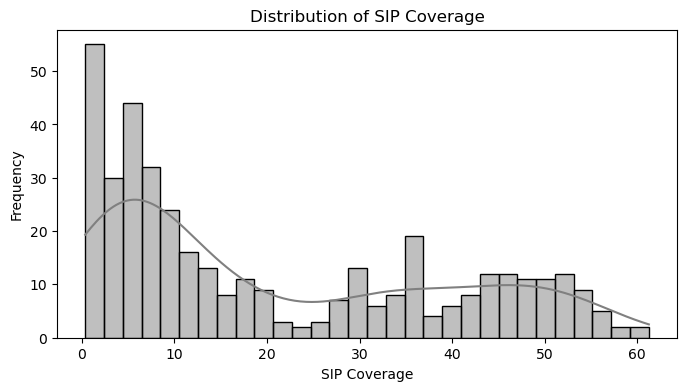

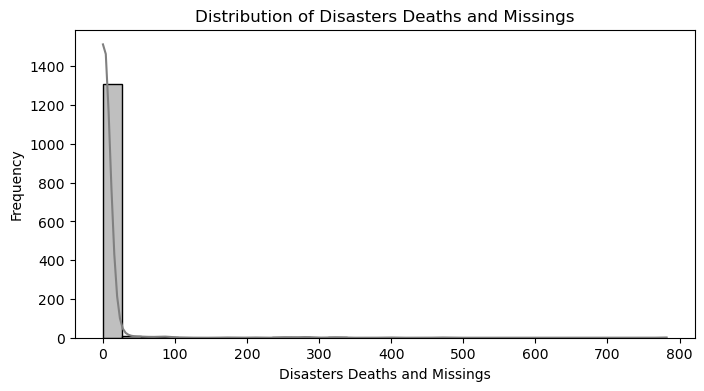

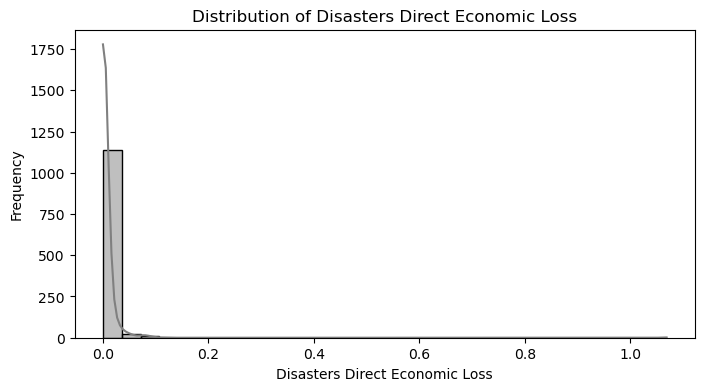

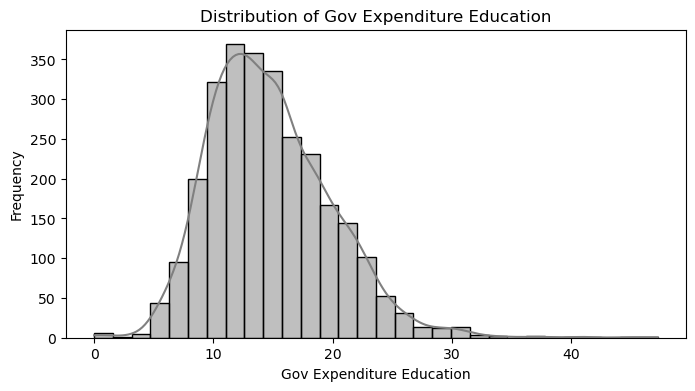

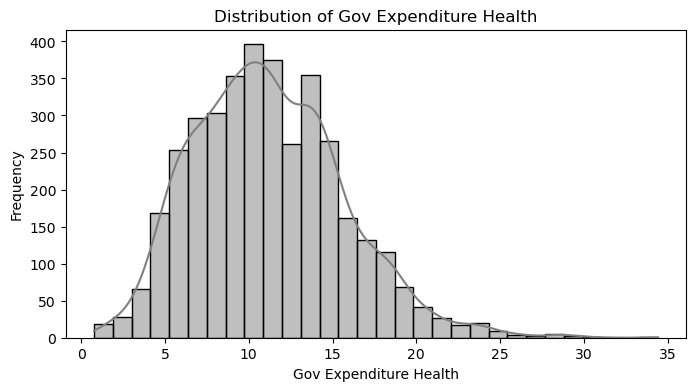

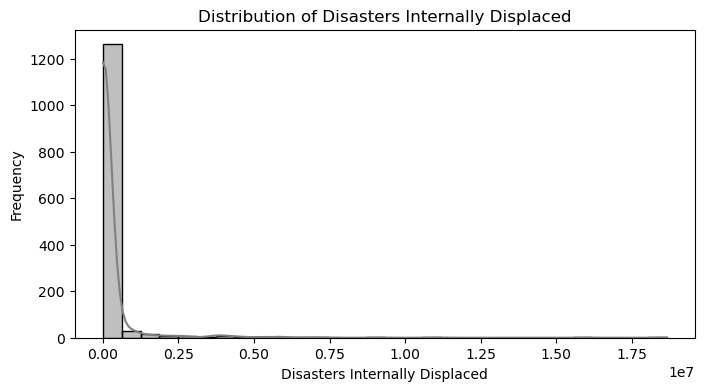

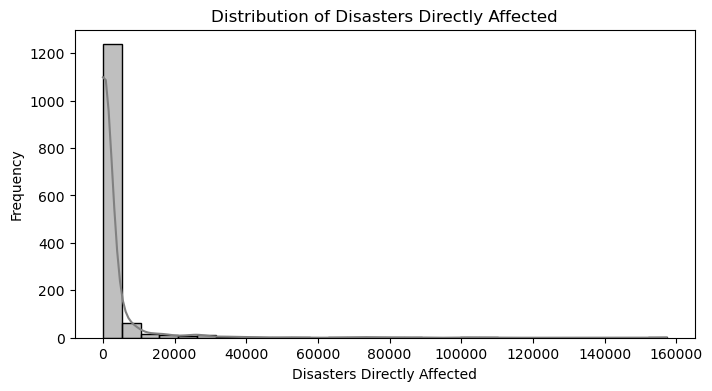

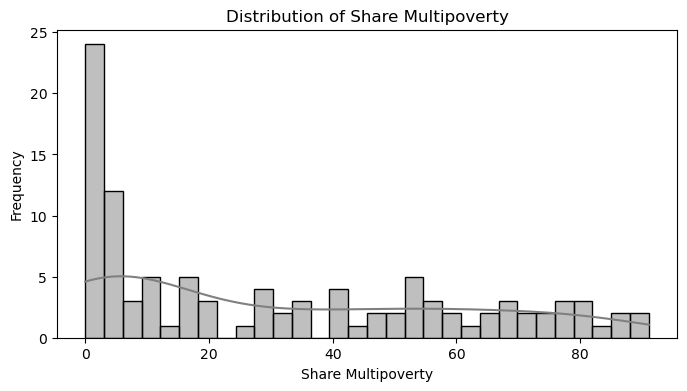

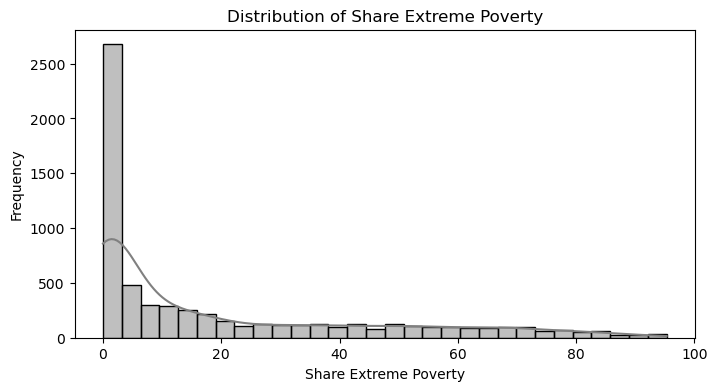

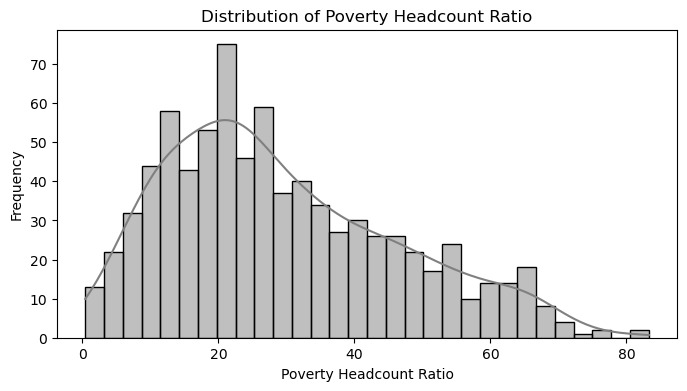

In [46]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(poverty_data[feature], kde=True, bins=30, color="grey")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [47]:
numerical_features_log = [
    "Disasters Deaths and Missings", 
    "Disasters Direct Economic Loss", 
    "Disasters Internally Displaced", 
    "Disasters Directly Affected", 
    "Share Extreme Poverty", 
]

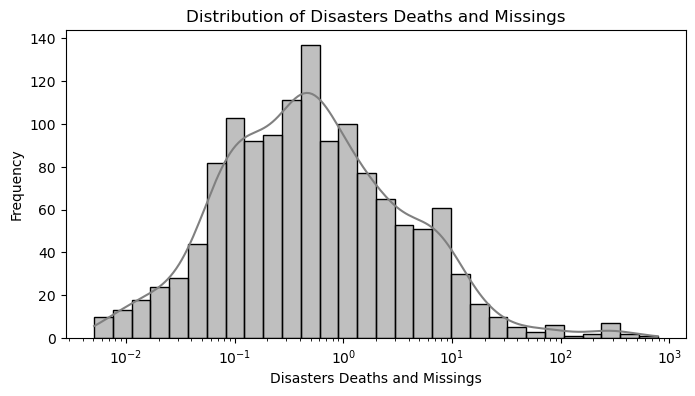

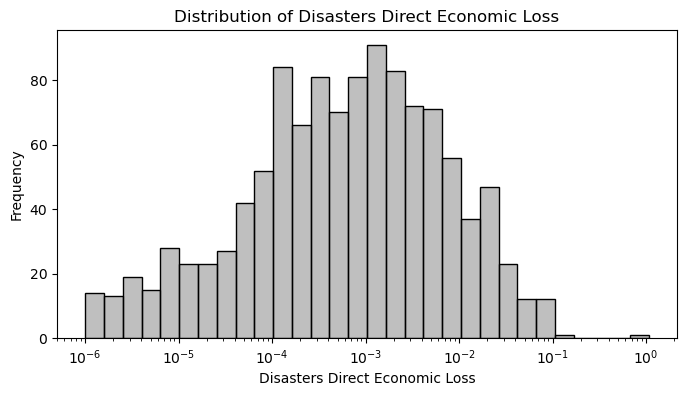

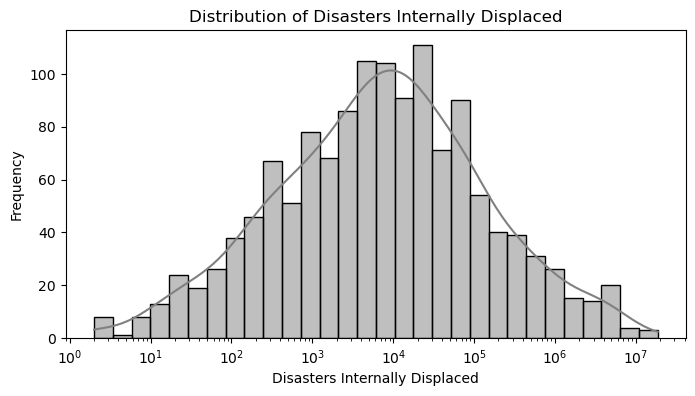

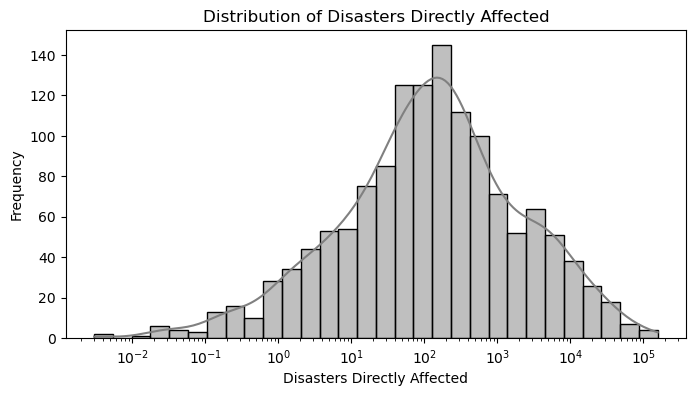

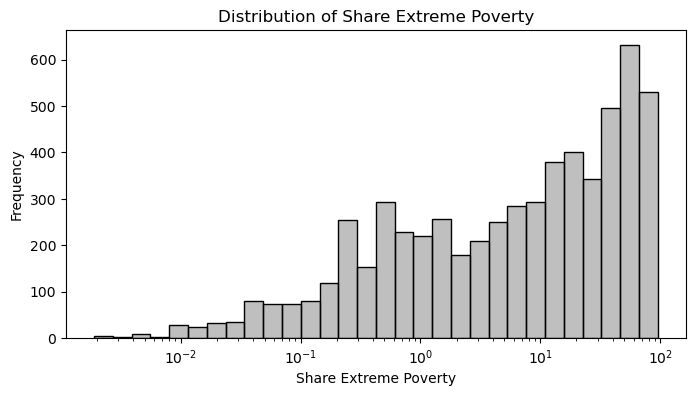

In [48]:
for feature in numerical_features_log:
    plt.figure(figsize=(8, 4))
    sns.histplot(poverty_data[feature], kde=True, log_scale=True, bins=30, color="grey")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()